In [1]:
!pip install seaborn
!pip install sklearn
!pip install statsmodels 

You should consider upgrading via the 'c:\users\user\pycharmprojects\finalprojectshecodes\venv\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\user\pycharmprojects\finalprojectshecodes\venv\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\user\pycharmprojects\finalprojectshecodes\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import statistics
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn import datasets
from sklearn import linear_model
from statsmodels.graphics.api import abline_plot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score
from sklearn import metrics

Load data

In [4]:
all_data = pd.read_csv(r"C:\Users\User\Desktop\Final Project\all_data.csv")

In [5]:
all_data.head()

,Country name,continent,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,...,Dystopia + residual,area,population (thousands),avg precipitation,disFromEquator,unemployed_rate,AvgTemp,standard_of_living_num,standard_of_living,independence_year
0,Afghanistan,Asia,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,...,3.253,652230.0,38041754.0,327.0,3834.685659,11.730000,12.60,0.511,bad,1919.0
1,Albania,Europe,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,...,2.868,28748.0,2854191.0,1485.0,4589.478939,11.700000,11.40,0.795,medium,1912.0
2,Algeria,Africa,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,...,2.839,2381741.0,43053054.0,89.0,4083.825629,12.830000,22.50,0.748,medium,1962.0
3,Argentina,America,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,...,2.967,2780400.0,44938712.0,591.0,-3842.114552,11.670000,14.80,0.845,good,1816.0
4,Armenia,Asia,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,...,2.798,29743.0,2957731.0,562.0,4461.932955,20.209999,7.15,0.776,medium,1991.0


Data visualizations - Regional Area

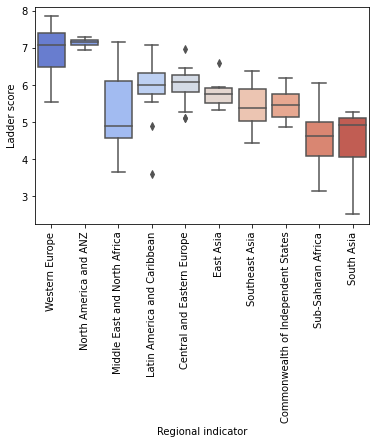

In [6]:
sns.boxplot(x='Regional indicator',y='Ladder score',data=all_data, palette='coolwarm')
plt.xticks(rotation=90)
plt.show()

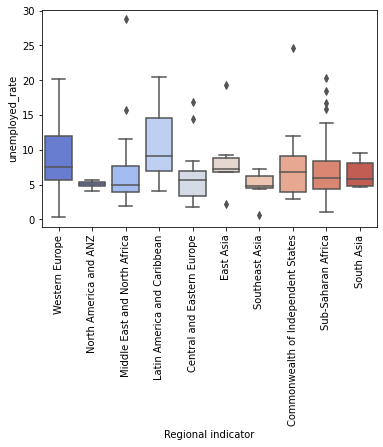

In [7]:
sns.boxplot(x='Regional indicator',y='unemployed_rate',data=all_data, palette='coolwarm')
plt.xticks(rotation=90)
plt.show()

Data visualizations - Country Name

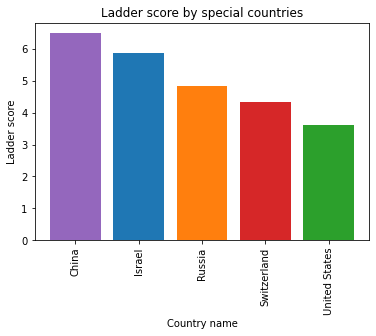

In [8]:
plt.bar(x='Country name',height='Ladder score',data=all_data[all_data['Country name'].isin(['Israel','United States','Russia','China','Switzerland'])]
        ,color = {'tab:blue','tab:orange','tab:green','tab:red','tab:purple'})
plt.xticks(rotation=90)
plt.xlabel('Country name')
plt.ylabel("Ladder score")
plt.title('Ladder score by special countries')
plt.show()

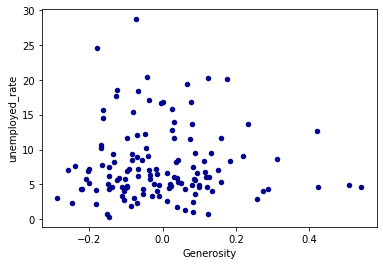

In [9]:
ax1 = all_data.plot.scatter(x='Generosity', y='unemployed_rate', c='DarkBlue')

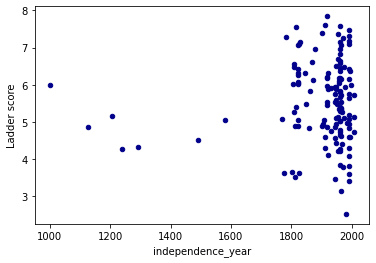

In [10]:
ax1 = all_data.plot.scatter(x='independence_year', y='Ladder score', c='DarkBlue')

In [20]:
pie_lifeLevel_label=all_data_no_nan.groupby('standard_of_living')['Country name'].count().reset_index()
pie_lifeLevel_label

,standard_of_living,Country name
0,bad,28
1,good,47
2,medium,45


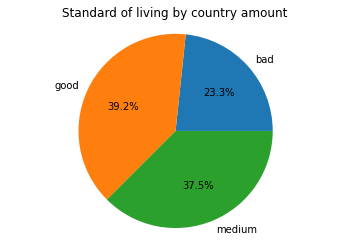

In [21]:
lifeLevel_portion = pie_lifeLevel_label['Country name']

fig, ax = plt.subplots()
my_labels = pie_lifeLevel_label['standard_of_living']
ax.pie(x=lifeLevel_portion, labels=my_labels, autopct='%1.1f%%')
ax.axis('equal')  
ax.set_title('Standard of living by country amount')

plt.show()

Data visualizations - Continent analysis

In [22]:
GDP=all_data.groupby('continent')['Logged GDP per capita'].median().to_frame().reset_index()
GDP

,continent,Logged GDP per capita
0,Africa,9.6260
1,America,9.5875
2,Asia,9.3825
3,Europe,9.5935
4,Oceania,9.3695


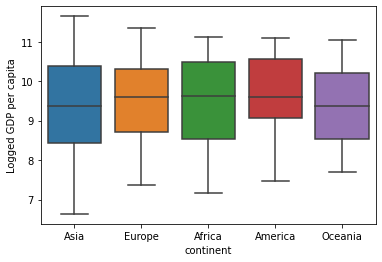

In [23]:
sns.boxplot(x='continent',y='Logged GDP per capita',data=all_data)
plt.show()

In [24]:
pie_chart_area_label=all_data_no_nan.groupby('continent')['population (thousands)'].sum().reset_index()
pie_chart_area_label

,continent,population (thousands)
0,Africa,8.579673e+08
1,America,9.265919e+08
2,Asia,4.118819e+09
3,Europe,5.545680e+08
4,Oceania,3.028131e+07


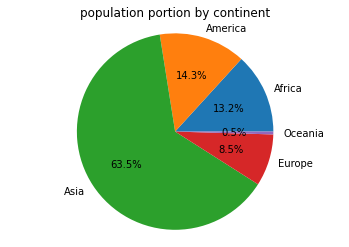

In [25]:
population_size = pie_chart_label['population (thousands)']

fig, ax = plt.subplots()
my_labels = pie_chart_label['continent']
ax.pie(x=population_size, labels=my_labels, autopct='%1.1f%%')
ax.axis('equal')  
ax.set_title('population portion by continent')

plt.show()

In [26]:
pie_chart_area_label=all_data_no_nan.groupby('continent')['area'].sum().reset_index()
pie_chart_area_label

,continent,area
0,Africa,19681375.0
1,America,28366150.0
2,Asia,27650376.0
3,Europe,5099675.0
4,Oceania,7962491.0


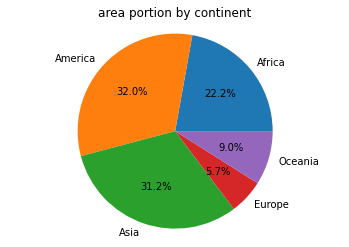

In [27]:
area_portion = pie_chart_area_label['area']

fig, ax = plt.subplots()
my_labels = pie_chart_area_label['continent']
ax.pie(x=area_portion, labels=my_labels, autopct='%1.1f%%')
ax.axis('equal')  
ax.set_title('area portion by continent')

plt.show()

Data measurments: min,max,count,sum

In [12]:
all_data[all_data['Ladder score']==all_data['Ladder score'].min()]

,Country name,continent,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,...,Dystopia + residual,area,population (thousands),avg precipitation,disFromEquator,unemployed_rate,AvgTemp,standard_of_living_num,standard_of_living,independence_year
148,Zimbabwe,Africa,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,...,1.895,390757.0,14645468.0,657.0,-1979.838807,5.73,21.0,0.571,bad,1980.0


In [13]:
all_data[all_data['Ladder score']==all_data['Ladder score'].max()]

,Country name,continent,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,...,Dystopia + residual,area,population (thousands),avg precipitation,disFromEquator,unemployed_rate,AvgTemp,standard_of_living_num,standard_of_living,independence_year
0,Afghanistan,Asia,Western Europe,7.842,0.032,7.904,7.78,10.775,0.954,72.0,...,3.253,652230.0,38041754.0,327.0,3834.685659,11.73,12.6,0.511,bad,1919.0


In [14]:
all_data.groupby('Regional indicator').size().sort_values(ascending=False) \
  .reset_index(name='Country name')

,Regional indicator,Country name
0,Sub-Saharan Africa,36
1,Western Europe,21
2,Latin America and Caribbean,20
3,Central and Eastern Europe,17
4,Middle East and North Africa,17
5,Commonwealth of Independent States,12
6,Southeast Asia,9
7,South Asia,7
8,East Asia,6
9,North America and ANZ,4


In [15]:
all_data.groupby('continent').size().sort_values(ascending=False) \
  .reset_index(name='Country name')

,continent,Country name
0,Asia,44
1,Africa,41
2,Europe,40
3,America,22
4,Oceania,2


Null identifications and Extra calculations

In [16]:
 all_data.isnull().sum()

Country name                                   0
continent                                      0
Regional indicator                             0
Ladder score                                   0
Standard error of ladder score                 0
upperwhisker                                   0
lowerwhisker                                   0
Logged GDP per capita                          0
Social support                                 0
Healthy life expectancy                        0
Freedom to make life choices                   0
Generosity                                     0
Perceptions of corruption                      0
Ladder score in Dystopia                       0
Explained by: Log GDP per capita               0
Explained by: Social support                   0
Explained by: Healthy life expectancy          0
Explained by: Freedom to make life choices     0
Explained by: Generosity                       0
Explained by: Perceptions of corruption        0
Dystopia + residual 

In [17]:
all_data_no_nan = all_data.copy().dropna()

In [18]:
pie_chart_label=all_data_no_nan.groupby('continent')['population (thousands)'].sum().reset_index()
pie_chart_label

,continent,population (thousands)
0,Africa,8.579673e+08
1,America,9.265919e+08
2,Asia,4.118819e+09
3,Europe,5.545680e+08
4,Oceania,3.028131e+07


In [19]:
all_data['population_precentage']=all_data['population (thousands)'].apply(lambda x: x/7866403556)
all_data['population_precentage'].to_frame()

,population_precentage
0,0.004836
1,0.000363
2,0.005473
3,0.005713
4,0.000376
...,...
144,NaN
145,0.012263
146,NaN
147,0.002271


Correlation examination: Diagnostic  Analysis 

In [28]:
all_data_no_nan.columns

Index(['Country name', 'continent', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'area', 'population (thousands)',
       'avg precipitation', 'disFromEquator', 'unemployed_rate', 'AvgTemp',
       'standard_of_living_num', 'standard_of_living', 'independence_year'],
      dtype='object')

In [29]:
all_data_no_nan.drop(columns=['upperwhisker','lowerwhisker','Ladder score in Dystopia','Explained by: Log GDP per capita','Explained by: Social support',
       'Explained by: Healthy life expectancy','Explained by: Freedom to make life choices',
                              'Explained by: Generosity', 'Explained by: Perceptions of corruption'],inplace=True,axis=1)

In [30]:
correlation_all_data_no_nan = all_data_no_nan.corr()

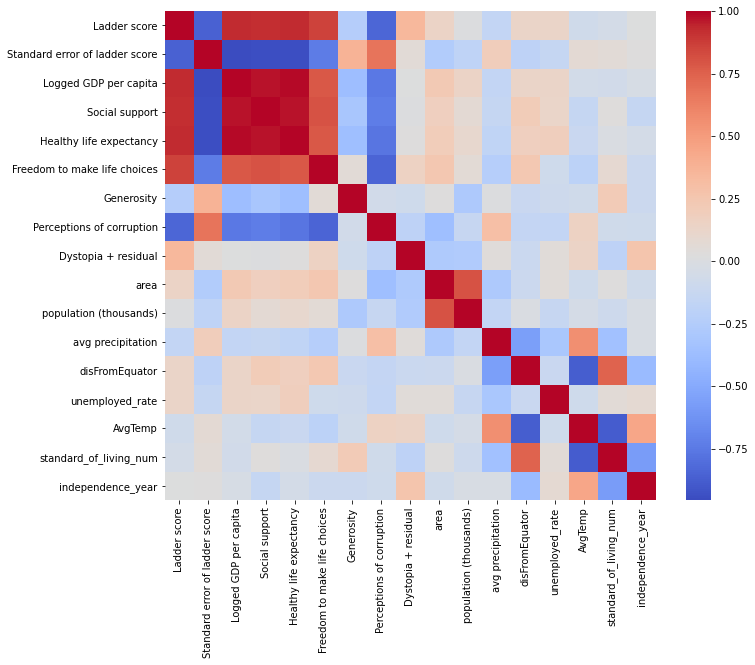

In [31]:
corr=correlation_all_data_no_nan.corr()
plt.subplots(figsize=(11,9))
sns.heatmap(corr, cmap='coolwarm')
plt.show()

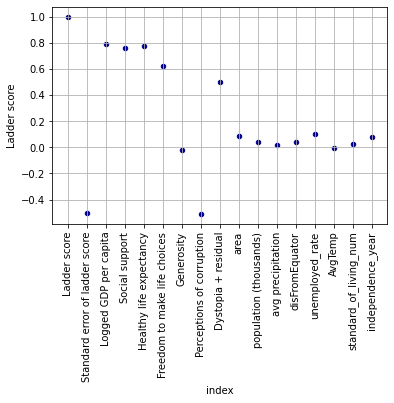

In [32]:
ax1 = correlation_all_data_no_nan['Ladder score'].to_frame().reset_index().plot.scatter(x='index', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [33]:
correlation_all_data_no_nan['Ladder score'].to_frame().reset_index().columns

Index(['index', 'Ladder score'], dtype='object')

Showing interesting correlations between the Ladder score and all of the other parameters, from the not null dataset (customized dataset)

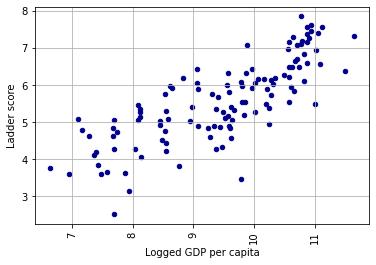

In [34]:
ax1 = all_data_no_nan.plot.scatter(x='Logged GDP per capita', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

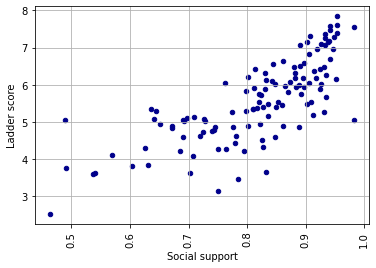

In [35]:
ax1 = all_data_no_nan.plot.scatter(x='Social support', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

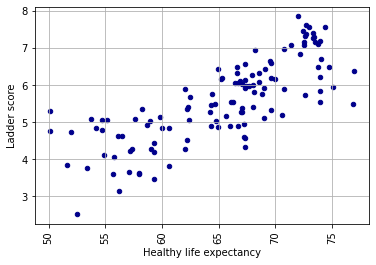

In [36]:
ax1 = all_data_no_nan.plot.scatter(x='Healthy life expectancy', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

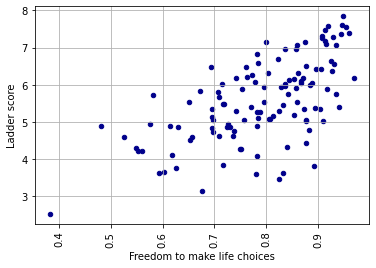

In [37]:
ax1 = all_data_no_nan.plot.scatter(x='Freedom to make life choices', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

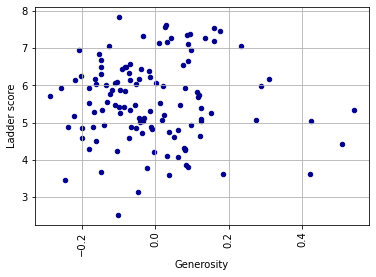

In [38]:
ax1 = all_data_no_nan.plot.scatter(x='Generosity', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

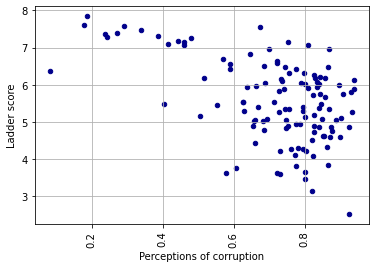

In [39]:
ax1 = all_data_no_nan.plot.scatter(x='Perceptions of corruption', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

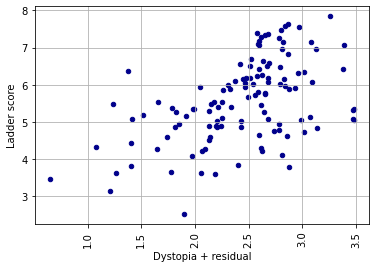

In [40]:
ax1 = all_data_no_nan.plot.scatter(x='Dystopia + residual', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

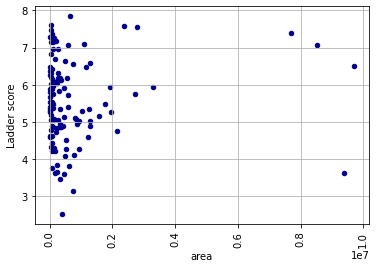

In [41]:
ax1 = all_data_no_nan.plot.scatter(x='area', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

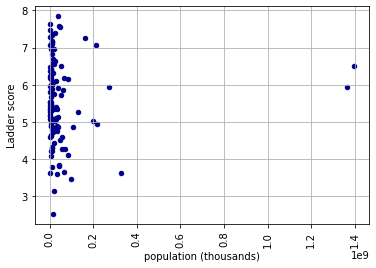

In [42]:
ax1 = all_data_no_nan.plot.scatter(x='population (thousands)', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

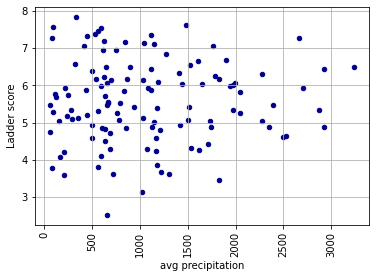

In [43]:
ax1 = all_data_no_nan.plot.scatter(x='avg precipitation', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

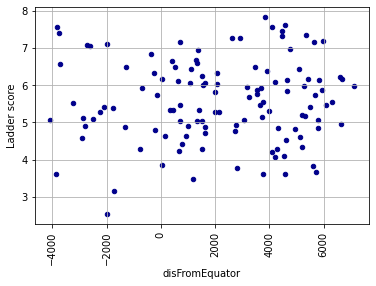

In [44]:
ax1 = all_data_no_nan.plot.scatter(x='disFromEquator', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

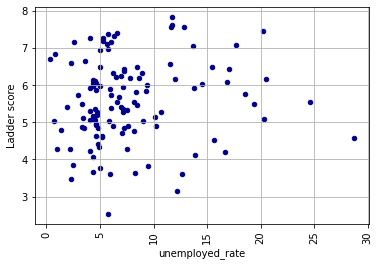

In [45]:
ax1 = all_data_no_nan.plot.scatter(x='unemployed_rate', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

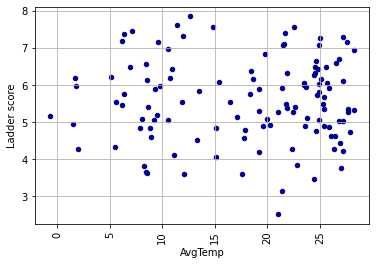

In [46]:
ax1 = all_data_no_nan.plot.scatter(x='AvgTemp', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

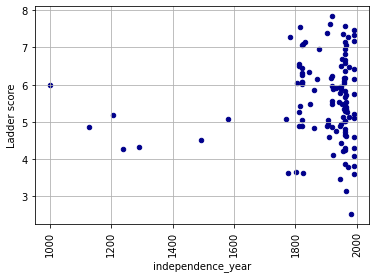

In [47]:
ax1 = all_data_no_nan.plot.scatter(x='independence_year', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

Interesting correlation between 2 parameters (not Ladder Score)

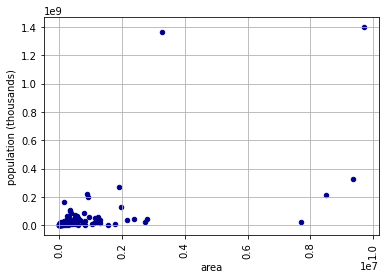

In [48]:
ax1 = all_data_no_nan.plot.scatter(x='area', y='population (thousands)', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

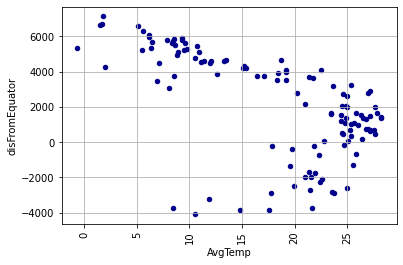

In [49]:
ax1 = all_data_no_nan.plot.scatter(x='AvgTemp', y='disFromEquator', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

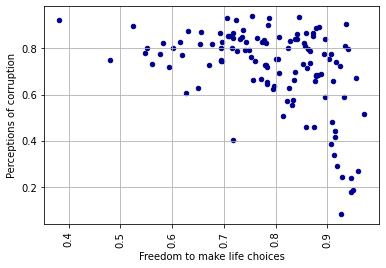

In [50]:
ax1 = all_data_no_nan.plot.scatter(x='Freedom to make life choices', y='Perceptions of corruption', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show() 

In [51]:
clean_data=all_data_no_nan.copy().drop(['Country name','continent','Regional indicator','standard_of_living'],axis=1)
clean_data.to_csv(r"C:\Users\User\Desktop\Final Project\clean_data.csv", index=False)

In [52]:
clean_data.head()

,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,area,population (thousands),avg precipitation,disFromEquator,unemployed_rate,AvgTemp,standard_of_living_num,independence_year
0,7.842,0.032,10.775,0.954,72.0,0.949,-0.098,0.186,3.253,652230.0,38041754.0,327.0,3834.685659,11.730000,12.60,0.511,1919.0
1,7.620,0.035,10.933,0.954,72.7,0.946,0.030,0.179,2.868,28748.0,2854191.0,1485.0,4589.478939,11.700000,11.40,0.795,1912.0
2,7.571,0.036,11.117,0.942,74.4,0.919,0.025,0.292,2.839,2381741.0,43053054.0,89.0,4083.825629,12.830000,22.50,0.748,1962.0
3,7.554,0.059,10.878,0.983,73.0,0.955,0.160,0.673,2.967,2780400.0,44938712.0,591.0,-3842.114552,11.670000,14.80,0.845,1816.0
4,7.464,0.027,10.932,0.942,72.4,0.913,0.175,0.338,2.798,29743.0,2957731.0,562.0,4461.932955,20.209999,7.15,0.776,1991.0


In [53]:
X_train, X_test, y_train , y_test = train_test_split(clean_data.copy().drop(['Ladder score'],axis=1), clean_data['Ladder score'], test_size=0.33, random_state=1)
                                                                                                     
regressor = ElasticNet(alpha=0.05)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
r2_score(y_test, y_pred)


0.9231042854897499

In [54]:
mean_squared_error(y_test, y_pred)

0.07205503681473321

In [55]:
feature_list = X_test.columns
all_data_no_nan['pred'] = all_data_no_nan[feature_list].apply(lambda row: regressor.predict(np.array(row).reshape(1, -1)), axis=1)
all_data_no_nan['error']=all_data_no_nan['Ladder score']-all_data_no_nan['pred']
all_data_no_nan['absolute_error']=all_data_no_nan['error'].apply(lambda x: round(abs(x[0]), 2))

all_data_no_nan.sort_values('absolute_error')


,Country name,continent,Regional indicator,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,...,avg precipitation,disFromEquator,unemployed_rate,AvgTemp,standard_of_living_num,standard_of_living,independence_year,pred,error,absolute_error
46,Ghana,Africa,Middle East and North Africa,6.106,0.066,10.817,0.843,66.900,0.867,-0.104,...,1187.0,622.261387,4.53,27.20,0.611,medium,1957.0,[6.107549975037195],[-0.001549975037194784],0.00
78,Luxembourg,Europe,Southeast Asia,5.411,0.039,8.973,0.850,68.034,0.940,-0.098,...,934.0,5508.995980,6.96,8.65,0.916,good,1815.0,[5.41317703674399],[-0.0021770367439906124],0.00
112,Romania,Europe,Sub-Saharan Africa,4.834,0.081,7.678,0.672,54.151,0.695,-0.009,...,637.0,4930.386278,4.84,8.80,0.828,good,1859.0,[4.822810078250949],[0.011189921749050313],0.01
16,Brazil,America,Western Europe,7.064,0.038,10.707,0.934,72.500,0.859,0.233,...,1761.0,-2615.147951,13.67,24.95,0.765,medium,1822.0,[7.079710716062825],[-0.01571071606282537],0.02
55,India,Asia,East Asia,5.940,0.040,10.611,0.884,75.100,0.796,-0.258,...,1083.0,3182.542134,7.11,23.65,0.645,medium,1947.0,[5.959909310451176],[-0.019909310451175166],0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Norway,Europe,Middle East and North Africa,4.948,0.046,10.240,0.822,67.199,0.576,-0.139,...,1414.0,6652.812283,4.62,1.50,0.957,good,1905.0,[5.585590219763928],[-0.6375902197639274],0.64
67,Kenya,Africa,Western Europe,5.723,0.046,10.279,0.823,72.600,0.582,-0.288,...,630.0,-142.847948,2.98,24.75,0.601,medium,1963.0,[6.376232209790491],[-0.6532322097904908],0.65
41,France,Europe,Commonwealth of Independent States,6.179,0.068,8.836,0.918,65.255,0.970,0.311,...,867.0,5425.268249,8.62,10.70,0.901,good,1958.0,[5.4721646645322455],[0.7068353354677548],0.71
121,Slovenia,Europe,Middle East and North Africa,4.596,0.058,9.266,0.691,67.201,0.656,-0.201,...,1162.0,5113.610093,5.17,8.90,0.917,good,1991.0,[5.387989362469353],[-0.7919893624693533],0.79


In [56]:
X = clean_data.copy().drop(['Ladder score'],axis=1)
y = clean_data['Ladder score']
lasso = linear_model.Lasso(alpha=0.05)

In [57]:
lasso.fit(X_train, y_train)
lasso.score(X, y)

0.9191489907498425

In [58]:
cv_results = cross_validate(lasso, X, y, cv=5)
sorted(cv_results.keys())
cv_results['test_score']
print(cv_results)

{'fit_time': array([0.00299573, 0.00400567, 0.0020237 , 0.00299358, 0.00198126]), 'score_time': array([0.00199175, 0.00197816, 0.00196671, 0.00099826, 0.00199151]), 'test_score': array([-3.38737076, -1.37706288, -1.64796544, -5.35177482, -0.15436855])}


In [59]:
scores = cross_validate(lasso, X, y, cv=5, scoring=('r2','neg_mean_squared_error'),return_train_score=True)
print(scores['test_neg_mean_squared_error'])
scores.keys()

[-0.55704728 -0.06990285 -0.11739475 -0.12991863 -0.30130154]


dict_keys(['fit_time', 'score_time', 'test_r2', 'train_r2', 'test_neg_mean_squared_error', 'train_neg_mean_squared_error'])

In [60]:
DecisionTree = tree.DecisionTreeRegressor(splitter='best',random_state=0,criterion='friedman_mse')
cv_results = cross_validate(DecisionTree, X, y, cv=5)
print(cv_results) 

{'fit_time': array([0.00598264, 0.00299239, 0.00398993, 0.00299215, 0.00299191]), 'score_time': array([0.00199533, 0.00199389, 0.0009973 , 0.00199389, 0.0009973 ]), 'test_score': array([ -9.82926904,  -9.80335922, -10.54453587, -41.38362266,
        -3.65909126])}


In [61]:
DecisionTree.fit(X_train, y_train)
DecisionTree.score(X, y)

0.9002480476764406

In [62]:
neigh = KNeighborsRegressor(n_neighbors=5,weights='distance',algorithm='brute',metric='seuclidean')

In [63]:
neigh.fit(X_train, y_train)
neigh.score(X, y)

c:\users\user\pycharmprojects\finalprojectshecodes\venv\lib\site-packages\sklearn\metrics\pairwise.py:1450: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='seuclidean' will require V to be specified if Y is passed.
  warnings.warn(


0.9347478612745789

c:\users\user\pycharmprojects\finalprojectshecodes\venv\lib\site-packages\sklearn\metrics\pairwise.py:1450: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='seuclidean' will require V to be specified if Y is passed.
  warnings.warn(
c:\users\user\pycharmprojects\finalprojectshecodes\venv\lib\site-packages\sklearn\metrics\pairwise.py:1450: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='seuclidean' will require V to be specified if Y is passed.
  warnings.warn(
c:\users\user\pycharmprojects\finalprojectshecodes\venv\lib\site-packages\sklearn\metrics\pairwise.py:1450: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='seuclidean' will require V to be specified if Y is passed.
  warnings.warn(
c:\users\user\pycharmprojects\finalprojectshecodes\venv\lib\site-packages\sklearn\metrics\pairwise.py:1450: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='seuclide

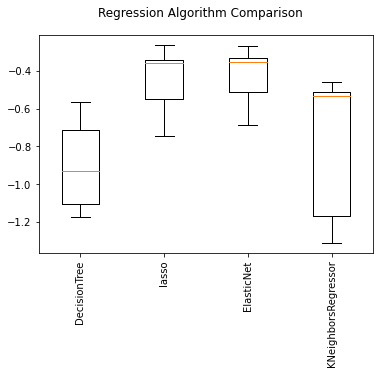

In [64]:
models = [DecisionTree,lasso,regressor,neigh]
results = []
names = ['DecisionTree','lasso','ElasticNet','KNeighborsRegressor']
for model in models:
    cv_results = cross_validate(model,X, y, cv=5, scoring=('neg_root_mean_squared_error'))
    results.append(cv_results['test_score'])

fig = plt.figure()
fig.suptitle('Regression Algorithm Comparison')
plt.boxplot(results)
plt.xticks([1,2,3,4],names,rotation='vertical')
plt.show()

KPI's

In [66]:
print("R2 (explained variance):", round(metrics.r2_score(y_test, y_pred), 2))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-y_pred)/y_pred)), 2))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", (np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print("Max Error:", round(metrics.max_error(y_test, y_pred),2))

R2 (explained variance): 0.61
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.09
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 0.6028293705519
Max Error: 1.61


Residuals - DecisionTree model

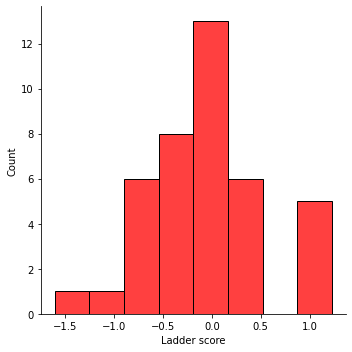

In [65]:
model = DecisionTree
results = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
residuals = y_test - y_pred

sns.displot(residuals, color="red")
plt.show()

Feature importance - DecisionTree model

In [68]:
print(importance)

[3.32246824e-03 7.13123646e-03 6.14057133e-01 2.21468467e-01
 1.07054033e-02 6.24737378e-04 1.10148194e-02 1.02810717e-01
 8.13272950e-03 2.52849611e-06 6.29149739e-04 3.76493700e-03
 1.60175625e-02 1.51478745e-04 1.15847184e-04 5.07850117e-05]


Feature: Standard error of ladder score, Score: 0.003322
Feature: Logged GDP per capita, Score: 0.007131
Feature: Social support, Score: 0.614057
Feature: Healthy life expectancy, Score: 0.221468
Feature: Freedom to make life choices, Score: 0.010705
Feature: Generosity, Score: 0.000625
Feature: Perceptions of corruption, Score: 0.011015
Feature: Dystopia + residual, Score: 0.102811
Feature: area, Score: 0.008133
Feature: population (thousands), Score: 0.000003
Feature: avg precipitation, Score: 0.000629
Feature: disFromEquator, Score: 0.003765
Feature: unemployed_rate, Score: 0.016018
Feature: AvgTemp, Score: 0.000151
Feature: standard_of_living_num, Score: 0.000116
Feature: independence_year, Score: 0.000051


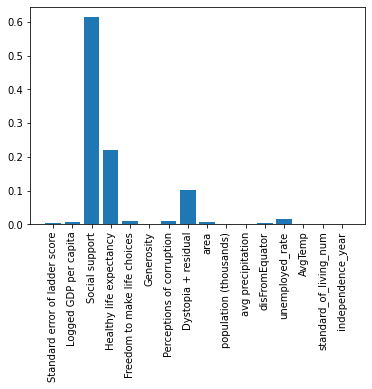

In [67]:
model = DecisionTree

model.fit(X_train, y_train)

importance = model.feature_importances_

feature_names= X_train.columns
for feature_name, score in zip(feature_names, importance):
    print('Feature: %s, Score: %f' % (feature_name,score))

pyplot.bar([x for x in range(len(importance))], importance)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],feature_names,rotation='vertical')
pyplot.show()

Predicted vs True

In [69]:
max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))

max_true, max_pred = list(y_test)[max_idx], list(y_pred)[max_idx]


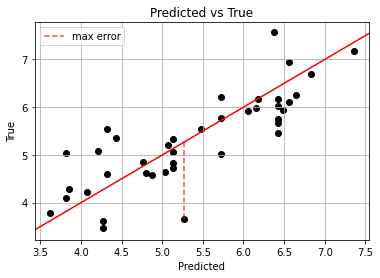

In [70]:
fig, ax = plt.subplots(1, 1)
y_pred =  model.predict(X_test)
ax.scatter(y_pred, y_test, color="black")
abline_plot(intercept=0, slope=1, color="red", ax=ax)
ax.vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
ax.grid(True)
ax.set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
ax.legend()
pyplot.show()

KPI's - lasso model

In [72]:
print("R2 (explained variance):", round(metrics.r2_score(y_test, y_pred), 2))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-y_pred)/y_pred)), 2))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", (np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print("Max Error:", round(metrics.max_error(y_test, y_pred),2))

R2 (explained variance): 0.92
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.04
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 0.28190456036985234
Max Error: 0.85


Residuals - lasso model

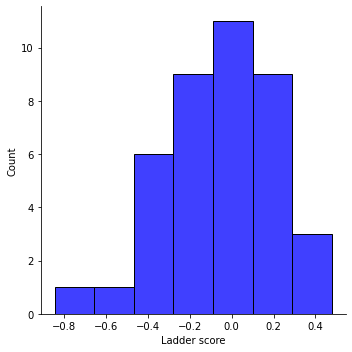

In [71]:
model = lasso
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
residuals = y_test - y_pred

sns.displot(residuals, color="blue")
plt.show()

Feature importance - lasso model

In [75]:
print(importance)

[0.00000000e+00 3.61004027e-01 0.00000000e+00 7.10794109e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 9.09389975e-01
 7.42038062e-08 4.56584127e-10 3.32699135e-05 2.68054557e-05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.32989433e-05]


Feature: Standard error of ladder score, Score: 0.000000
Feature: Logged GDP per capita, Score: 0.361004
Feature: Social support, Score: 0.000000
Feature: Healthy life expectancy, Score: 0.071079
Feature: Freedom to make life choices, Score: 0.000000
Feature: Generosity, Score: 0.000000
Feature: Perceptions of corruption, Score: 0.000000
Feature: Dystopia + residual, Score: 0.909390
Feature: area, Score: 0.000000
Feature: population (thousands), Score: 0.000000
Feature: avg precipitation, Score: 0.000033
Feature: disFromEquator, Score: 0.000027
Feature: unemployed_rate, Score: 0.000000
Feature: AvgTemp, Score: 0.000000
Feature: standard_of_living_num, Score: 0.000000
Feature: independence_year, Score: 0.000073


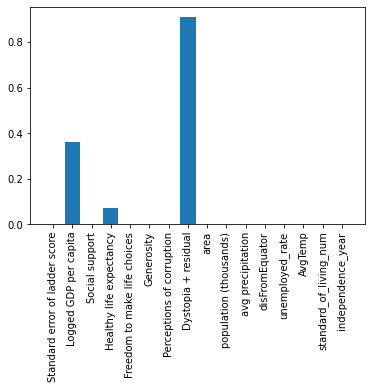

In [74]:
model= lasso
reg = model.fit(X_train, y_train)

importance = np.abs(lasso.coef_)
feature_names= X_train.columns

for feature_name, score in zip(feature_names, importance):
    print('Feature: %s, Score: %f' % (feature_name,score))

pyplot.bar([x for x in range(len(importance))], importance)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],feature_names,rotation='vertical')
pyplot.show()

In [76]:
max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))

max_true, max_pred = list(y_test)[max_idx], list(y_pred)[max_idx]


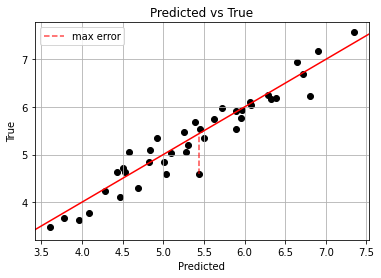

In [77]:
fig, ax = plt.subplots(1, 1)
y_pred =  model.predict(X_test)
ax.scatter(y_pred, y_test, color="black")
abline_plot(intercept=0, slope=1, color="red", ax=ax)
ax.vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
ax.grid(True)
ax.set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
ax.legend()
pyplot.show()

KPI's- linear regression model

In [79]:
print("R2 (explained variance):", round(metrics.r2_score(y_test, y_pred), 2))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-y_pred)/y_pred)), 2))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", (np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print("Max Error:", round(metrics.max_error(y_test, y_pred),2))

R2 (explained variance): 0.92
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.04
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 0.2684306927583603
Max Error: 0.79


Residuals - linear regression 

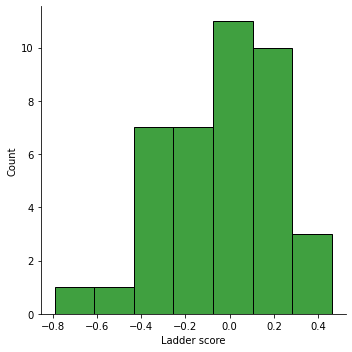

In [78]:
model = regressor
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
residuals = y_test - y_pred

sns.displot(residuals, color="green")
plt.show()

In [80]:
all_data_no_nan[all_data_no_nan['Dystopia + residual']<2][['Country name','Dystopia + residual','Ladder score']].sort_values('Dystopia + residual')


,Country name,Dystopia + residual,Ladder score
145,Vietnam,0.648,3.467
128,Switzerland,1.075,4.325
147,Zambia,1.205,3.145
76,Libya,1.236,5.477
141,United States,1.263,3.623
31,Cyprus,1.379,6.377
138,Ukraine,1.405,3.819
125,Sri Lanka,1.407,4.426
96,Netherlands,1.409,5.066
88,Moldova,1.520,5.198


Feature importance - linear regression model

In [83]:
print(importance)

[ 0.00000000e+00  3.95074373e-01  0.00000000e+00  6.41537279e-02
  6.97722003e-02  0.00000000e+00 -1.34148171e-01  9.10849612e-01
  6.69675585e-08 -4.29412746e-10  4.25937954e-05  2.53444572e-05
 -1.31933330e-04 -2.32102739e-04  0.00000000e+00  4.71996910e-05]


Feature: Standard error of ladder score, Score: 0.000000
Feature: Logged GDP per capita, Score: 0.395074
Feature: Social support, Score: 0.000000
Feature: Healthy life expectancy, Score: 0.064154
Feature: Freedom to make life choices, Score: 0.069772
Feature: Generosity, Score: 0.000000
Feature: Perceptions of corruption, Score: -0.134148
Feature: Dystopia + residual, Score: 0.910850
Feature: area, Score: 0.000000
Feature: population (thousands), Score: -0.000000
Feature: avg precipitation, Score: 0.000043
Feature: disFromEquator, Score: 0.000025
Feature: unemployed_rate, Score: -0.000132
Feature: AvgTemp, Score: -0.000232
Feature: standard_of_living_num, Score: 0.000000
Feature: independence_year, Score: 0.000047


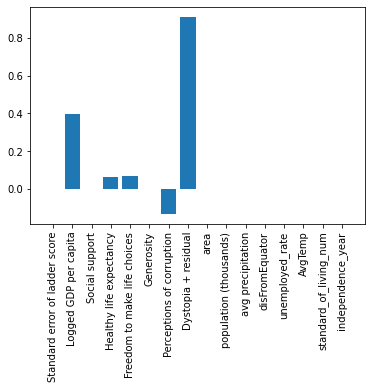

In [82]:
model= regressor

reg = model.fit(X_train, y_train)

importance = (model.coef_)
feature_names= X_train.columns

for feature_name, score in zip(feature_names, importance):
    print('Feature: %s, Score: %f' % (feature_name,score))

pyplot.bar([x for x in range(len(importance))], importance)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],feature_names,rotation='vertical')
pyplot.show()

In [84]:
max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))

max_true, max_pred = list(y_test)[max_idx], list(y_pred)[max_idx]


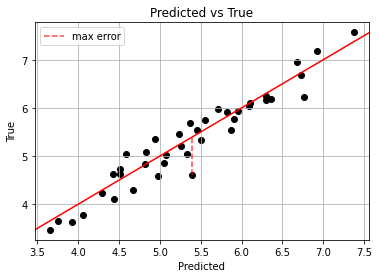

In [85]:
fig, ax = plt.subplots(1, 1)
y_pred =  model.predict(X_test)
ax.scatter(y_pred, y_test, color="black")
abline_plot(intercept=0, slope=1, color="red", ax=ax)
ax.vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
ax.grid(True)
ax.set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
ax.legend()
pyplot.show()